## Imports

In [1]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import networkx as nx
import ast

# for molecules
from rdkit import Chem
from rdkit.Chem import Draw

## Data Cleaning and Exploration

### Load Dataset and quick description

In [3]:
df = pd.read_csv('molecule_training.csv')
df['toxicity'] = df['target'].apply(lambda x: 'toxic' if x == 1 else 'non-toxic')
df.head()

,index,Maximum Degree,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,inchi_key,Graph,smiles,target,toxicity
0,2808,3.0,1.0,98.105,1.0,1.0,0.0,52.05,NCGC00258701-01,[((0; 1); 1.0); ((1; 2); 1.5); ((2; 3); 1.5); ...,CC1=CC(N)=NO1,0,non-toxic
1,5043,3.0,1.0,115.176,1.0,0.0,2.0,32.59,NCGC00255097-01,[((0; 1); 1.0); ((1; 2); 1.0); ((1; 3); 1.0); ...,CC(C)CC(C)=NO,0,non-toxic
2,7354,3.0,1.0,268.229,4.0,3.0,2.0,133.75,NCGC00095787-01,[((0; 1); 1.0); ((1; 2); 1.0); ((2; 3); 1.0); ...,OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)N2C=NC3=C2N=CN...,0,non-toxic
3,4078,3.0,0.0,408.093,0.0,0.0,4.0,111.76,NCGC00185776-01,[((3; 4); 1.0); ((4; 5); 2.0); ((4; 6); 1.0); ...,O.[Na+].[Na+].[O-]C(=O)CC(S[Au])C([O-])=O,0,non-toxic
4,1631,3.0,1.0,147.004,0.0,1.0,0.0,0.00,NCGC00257953-01,[((0; 1); 1.0); ((1; 2); 1.5); ((2; 3); 1.5); ...,ClC1=CC=C(Cl)C=C1,0,non-toxic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      7464 non-null   int64  
 1   Maximum Degree             7464 non-null   float64
 2   Minimum Degree             7464 non-null   float64
 3   Molecular Weight           7464 non-null   float64
 4   Number of H-Bond Donors    7464 non-null   float64
 5   Number of Rings            7464 non-null   float64
 6   Number of Rotatable Bonds  7464 non-null   float64
 7   Polar Surface Area         7464 non-null   float64
 8   inchi_key                  7464 non-null   object 
 9   Graph                      7464 non-null   object 
 10  smiles                     7464 non-null   object 
 11  target                     7464 non-null   int64  
 12  toxicity                   7464 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage:

In [6]:
df.describe()

,index,Maximum Degree,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,target
count,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000
mean,3731.500000,3.288183,0.875804,278.941072,1.252412,1.728162,4.208199,60.600695,0.040729
std,2154.815537,0.556245,0.390472,169.849479,2.012638,1.679037,4.525664,62.155964,0.197675
min,0.000000,0.000000,0.000000,41.053000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1865.750000,3.000000,1.000000,164.248000,0.000000,1.000000,1.000000,26.300000,0.000000
50%,3731.500000,3.000000,1.000000,240.444000,1.000000,1.000000,3.000000,46.530000,0.000000
75%,5597.250000,4.000000,1.000000,346.467000,2.000000,3.000000,6.000000,77.430000,0.000000
max,7463.000000,4.000000,2.000000,1950.681000,36.000000,30.000000,47.000000,1095.850000,1.000000


In [7]:
df.groupby('target')['index'].count().reset_index()

,target,index
0,0,7160
1,1,304


<Axes: xlabel='target', ylabel='count'>

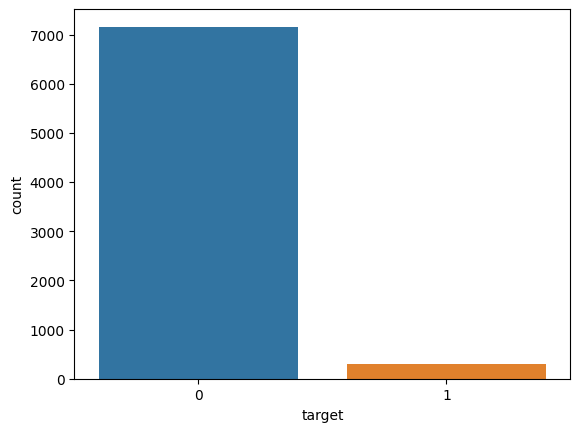

In [8]:
sns.countplot(x='target', data=df)

Remarque:  

**Bien faire attention quand on split les données entre train et test à garder cette répartition où il y'a bcp moins de molécules toxiques que non toxiques.**

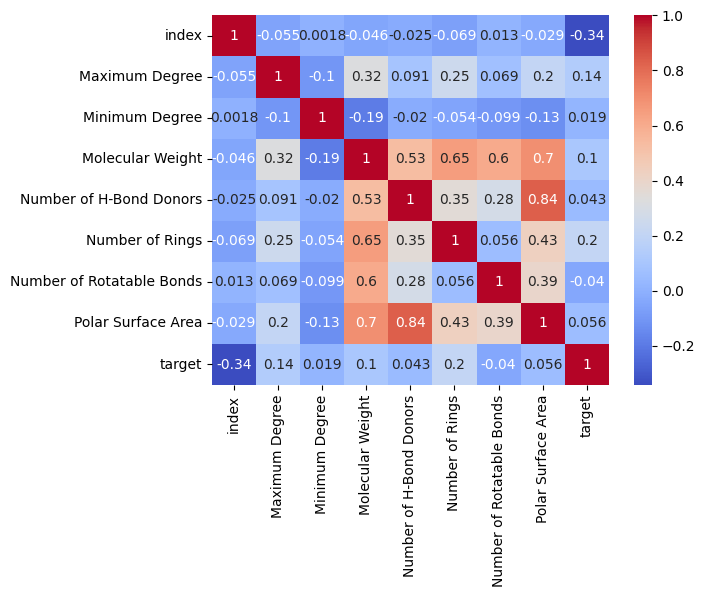

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

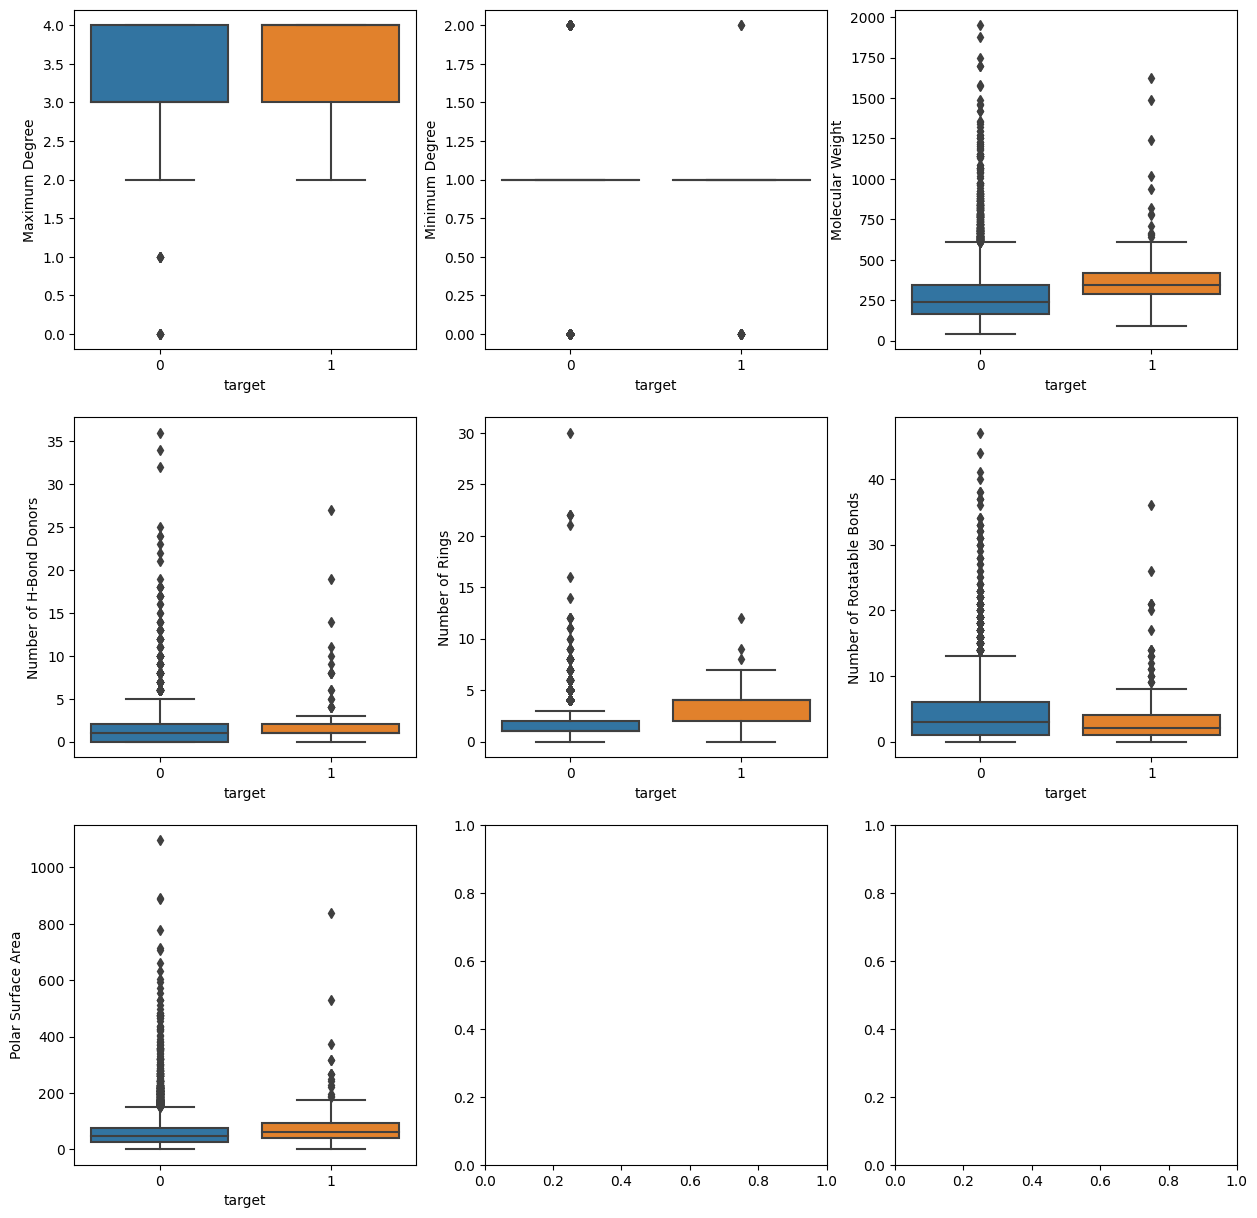

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

# Loop through the metrics and plot each one
for i, metric in enumerate(['Maximum Degree', 'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
                            'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']):
    row = i // 3
    col = i % 3
    
    sns.boxplot(x='target', y=metric, data=df, ax=axs[row, col])
  

plt.show()

### Transform graphs to networkx format

In [11]:
# Define a function to convert the graph string to a networkx graph object
def parse_graph(graph_string):
    # Parse the string as a list of tuples
    edges = ast.literal_eval(graph_string)
    # Create a new empty graph
    graph = nx.Graph()
    # Add edges to the graph
    for edge in edges:
        # Get the node labels and edge weight from the tuple
        node1, node2 = edge[0]
        weight = edge[1]
        # Add the edge to the graph
        graph.add_edge(node1, node2, weight=weight)
    return graph

In [12]:
# Convert the graph strings to networkx graph objects
df["Graph"] = df["Graph"].str.replace(";", ",")
df['graph_obj'] = df['Graph'].apply(parse_graph)

# use the molecules libraries
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)

In [13]:
# Extract number of nodes and edges
df['num_nodes'] = df['graph_obj'].apply(lambda x: x.number_of_nodes())
df['num_edges'] = df['graph_obj'].apply(lambda x: x.number_of_edges())

In [14]:
df.head()

,index,Maximum Degree,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,inchi_key,Graph,smiles,target,toxicity,graph_obj,mol,num_nodes,num_edges
0,2808,3.0,1.0,98.105,1.0,1.0,0.0,52.05,NCGC00258701-01,"[((0, 1), 1.0), ((1, 2), 1.5), ((2, 3), 1.5), ...",CC1=CC(N)=NO1,0,non-toxic,"(0, 1, 2, 3, 4, 5, 6)",<rdkit.Chem.rdchem.Mol object at 0x7f93749247b0>,7,7
1,5043,3.0,1.0,115.176,1.0,0.0,2.0,32.59,NCGC00255097-01,"[((0, 1), 1.0), ((1, 2), 1.0), ((1, 3), 1.0), ...",CC(C)CC(C)=NO,0,non-toxic,"(0, 1, 2, 3, 4, 5, 6, 7)",<rdkit.Chem.rdchem.Mol object at 0x7f93785a3dd0>,8,7
2,7354,3.0,1.0,268.229,4.0,3.0,2.0,133.75,NCGC00095787-01,"[((0, 1), 1.0), ((1, 2), 1.0), ((2, 3), 1.0), ...",OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)N2C=NC3=C2N=CN...,0,non-toxic,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",<rdkit.Chem.rdchem.Mol object at 0x7f9378655f20>,19,21
3,4078,3.0,0.0,408.093,0.0,0.0,4.0,111.76,NCGC00185776-01,"[((3, 4), 1.0), ((4, 5), 2.0), ((4, 6), 1.0), ...",O.[Na+].[Na+].[O-]C(=O)CC(S[Au])C([O-])=O,0,non-toxic,"(3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",<rdkit.Chem.rdchem.Mol object at 0x7f9378655dd0>,10,9
4,1631,3.0,1.0,147.004,0.0,1.0,0.0,0.00,NCGC00257953-01,"[((0, 1), 1.0), ((1, 2), 1.5), ((2, 3), 1.5), ...",ClC1=CC=C(Cl)C=C1,0,non-toxic,"(0, 1, 2, 3, 4, 5, 6, 7)",<rdkit.Chem.rdchem.Mol object at 0x7f9378655e40>,8,8


### Split the datasets

In [15]:
# Create two sub-datasets: one for toxic molecules and one for non-toxic molecules
toxic_df = df[df['target'] == 1]
non_toxic_df = df[df['target'] == 0]

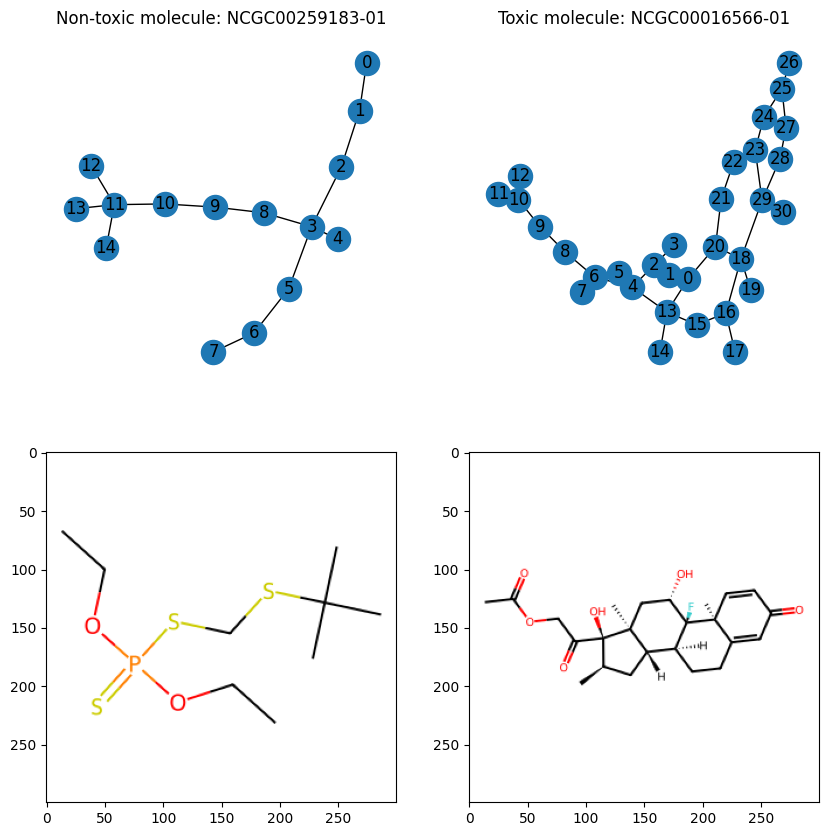

In [16]:
# Select a random non-toxic molecule and a random toxic molecule
non_toxic_mol = non_toxic_df.sample(1)
toxic_mol = toxic_df.sample(1)

# Get the graph objects of the selected molecules
non_toxic_graph = non_toxic_mol['graph_obj'].iloc[0]
toxic_graph = toxic_mol['graph_obj'].iloc[0]

img_non_toxic = non_toxic_mol['mol'].iloc[0]
img_toxic = toxic_mol['mol'].iloc[0]


# Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# Plot the non-toxic molecule
nx.draw_networkx(non_toxic_graph, ax=ax1)
ax1.set_title("Non-toxic molecule: {}".format(non_toxic_mol['inchi_key'].iloc[0]))
ax1.set_axis_off()

# Plot the toxic molecule
nx.draw_networkx(toxic_graph, ax=ax2)
ax2.set_title("Toxic molecule: {}".format(toxic_mol['inchi_key'].iloc[0]))
ax2.set_axis_off()

# Show non-toxic molecule
non_toxic_img = Draw.MolToImage(img_non_toxic)
ax3.imshow(non_toxic_img)

# Show toxic molecule
toxic_img = Draw.MolToImage(img_toxic)
ax4.imshow(toxic_img)

plt.show()
